In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2021-ai-w3-p2/train_data.csv
/kaggle/input/2021-ai-w3-p2/test_data.csv
/kaggle/input/2021-ai-w3-p2/sample_submit.csv


In [2]:
train = pd.read_csv("/kaggle/input/2021-ai-w3-p2/train_data.csv")
test = pd.read_csv("/kaggle/input/2021-ai-w3-p2/test_data.csv")
submit = pd.read_csv("/kaggle/input/2021-ai-w3-p2/sample_submit.csv")

In [3]:
train.describe(include = 'all')

,ID,company,model,year,transmission,mileage,fueltype,tax,mpg,engineSize,price
count,17085.00000,17085.000000,17085,17085.000000,17085.000000,17085.000000,17085.000000,17085.000000,17085.000000,17085.000000,17085.000000
unique,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fiesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.00000,1.955926,NaN,2016.981797,1.186772,23811.395142,2.285397,118.696225,56.449874,1.671659,16819.764472
std,4932.15901,1.294944,NaN,2.159569,0.992214,21403.239323,1.922741,65.087240,18.745561,0.599490,10015.265869
min,0.00000,0.000000,NaN,1998.000000,0.000000,1.000000,0.000000,0.000000,2.800000,0.000000,795.000000
25%,4271.00000,1.000000,NaN,2016.000000,1.000000,7881.000000,0.000000,125.000000,47.900000,1.200000,9999.000000
50%,8542.00000,2.000000,NaN,2017.000000,1.000000,18266.000000,4.000000,145.000000,56.500000,1.600000,14495.000000
75%,12813.00000,3.000000,NaN,2019.000000,1.000000,33322.000000,4.000000,145.000000,64.200000,2.000000,20700.000000


In [4]:
train.head(10)

,ID,company,model,year,transmission,mileage,fueltype,tax,mpg,engineSize,price
0,0,2,Focus,2019,1,3764,4,145,34.5,2.3,26299
1,1,1,I10,2015,1,27056,4,20,60.1,1.0,5495
2,2,3,A3,2019,3,3375,4,145,34.5,2.0,32400
3,3,3,A6,2019,0,5743,0,145,47.9,2.0,29990
4,4,2,Fiesta,2015,1,32782,4,0,65.7,1.0,7250
5,5,1,Tucson,2017,1,9146,0,150,61.7,1.7,14498
6,6,3,A1,2016,1,24015,4,0,67.3,1.0,11698
7,7,4,Aygo,2018,3,372,4,150,67.3,1.0,10290
8,8,3,Q5,2019,3,8566,0,145,38.2,2.0,33500
9,9,3,A1,2016,1,27400,4,30,55.4,1.4,11760


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17085 entries, 0 to 17084
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            17085 non-null  int64  
 1   company       17085 non-null  int64  
 2   model         17085 non-null  object 
 3   year          17085 non-null  int64  
 4   transmission  17085 non-null  int64  
 5   mileage       17085 non-null  int64  
 6   fueltype      17085 non-null  int64  
 7   tax           17085 non-null  int64  
 8   mpg           17085 non-null  float64
 9   engineSize    17085 non-null  float64
 10  price         17085 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 1.4+ MB


In [6]:
X_train = train.drop(['ID','company','price'], axis = 1)
X_test = test.drop(['ID','company'], axis = 1)
y_train = train['price']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.model = le.fit_transform(X_train.model)
X_test.model = le.transform(X_test.model)

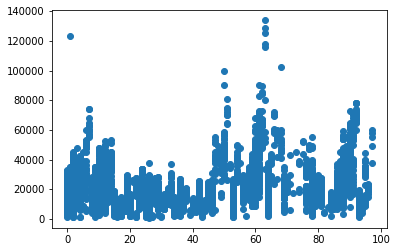

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_train.model, y_train)
plt.show()

In [8]:
d = []
for model in range(X_train.model.nunique()):
    tmp = []
    tmp.append(model)
    tmp.append(np.median(train[X_train.model == model].price))
    d.append(tmp)
    
df = pd.DataFrame(data = d, columns=['model', 'price'])
df = df.sort_values(by=['price'], axis=0, ignore_index = True)
df['modi_model'] = range(98)
df

,model,price,modi_model
0,30,1745.0,0
1,27,1895.0,1
2,82,4490.0,2
3,94,4950.0,3
4,43,4992.5,4
...,...,...,...
93,7,60000.0,93
94,66,60990.0,94
95,51,69971.5,95
96,92,70470.0,96


In [9]:
dic_model = df[['model', 'modi_model']].to_numpy()
dic_model = dict(dic_model)

def map_dict(x):
    return dic_model[x]

X_train.model = X_train.model.apply(map_dict)
X_test.model = X_test.model.apply(map_dict)

In [10]:
X_train

,model,year,transmission,mileage,fueltype,tax,mpg,engineSize
0,28,2019,1,3764,4,145,34.5,2.3
1,7,2015,1,27056,4,20,60.1,1.0
2,35,2019,3,3375,4,145,34.5,2.0
3,54,2019,0,5743,0,145,47.9,2.0
4,17,2015,1,32782,4,0,65.7,1.0
...,...,...,...,...,...,...,...,...
17080,30,2018,0,4666,4,145,32.5,3.0
17081,44,2020,3,22601,4,145,39.2,2.0
17082,21,2018,1,20312,4,145,47.1,1.5
17083,28,2018,1,18695,4,145,58.9,1.0


In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(17085, 8)
(17085,)
(16831, 8)


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
import torch
import torch.optim as optim

In [14]:
torch.manual_seed(1)

In [15]:
use_cuda = torch.cuda.is_available()
torch.cuda.init()
torch.cuda.manual_seed(1)
device = torch.device('cuda:0' if use_cuda else 'cpu')
print(device)

cuda:0


In [16]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train.to_numpy())

X_train = X_train.cuda()
X_test = X_test.cuda()
y_train = y_train.cuda()

In [17]:
# col 8, minMaxScaler, 'model'->linear, lr_scheduler

W = torch.zeros((8,1), device = 'cuda:0', requires_grad = True) 
b = torch.zeros(1, device = 'cuda:0', requires_grad = True)
optimizer = optim.SGD([W, b], lr = 1e-2)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')

nb_epochs = 10000

for epoch in range(nb_epochs+1):
    Hypothesis = X_train@W + b
    cost = torch.mean((Hypothesis - y_train)**2)
    optimizer.zero_grad()
    cost.backward() #기울기
    optimizer.step() #파라미터 튜닝
    scheduler.step(cost)
    
    if epoch%500 == 0:
        print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, Hypothesis.squeeze().detach(), cost.item()
    ))
        
predict = X_test@W + b
predict = predict.cpu().detach().numpy()
submit['price'] = predict
submit.to_csv("final_submit.csv", mode = "w", index = False)
submit

# 6722.56426

Epoch    0/10000 hypothesis: tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0') Cost: 383204160.000000
Epoch  500/10000 hypothesis: tensor([17323.6289, 15815.1650, 18464.8281,  ..., 16897.7227, 16928.9922,
        14522.5020], device='cuda:0') Cost: 101637352.000000
Epoch 1000/10000 hypothesis: tensor([17166.1973, 15892.7822, 17651.0059,  ..., 16819.0801, 16815.8809,
        15214.9795], device='cuda:0') Cost: 100932768.000000
Epoch 1500/10000 hypothesis: tensor([17166.1973, 15892.7822, 17651.0059,  ..., 16819.0801, 16815.8809,
        15214.9795], device='cuda:0') Cost: 100932768.000000
Epoch 2000/10000 hypothesis: tensor([17166.1973, 15892.7822, 17651.0059,  ..., 16819.0801, 16815.8809,
        15214.9795], device='cuda:0') Cost: 100932768.000000
Epoch 2500/10000 hypothesis: tensor([17166.1973, 15892.7822, 17651.0059,  ..., 16819.0801, 16815.8809,
        15214.9795], device='cuda:0') Cost: 100932768.000000
Epoch 3000/10000 hypothesis: tensor([17166.1973, 15892.7822, 17651.0059,

,ID,price
0,0,16259.482422
1,1,16195.947266
2,2,17329.501953
3,3,16166.498047
4,4,16417.929688
...,...,...
16826,16826,15549.553711
16827,16827,16674.861328
16828,16828,16403.470703
16829,16829,17693.611328
